### 猫狗分类
---
**data**: 一共选择了4000张图片，比例为8:1:1，两个类的数量一样  
  
**模型训练**：
1. 用四个卷积池化＋2个fc  
 1.1. 正常训练(有归一化，没有数据增强)  
 1.2. 不做图片归一化（没有rescale=1./255，没有数据增强）  
 1.3. 数据增强
 
 
 ---
 代码中很多都是重复的

##### 1.1 四个卷积池化＋2个fc

In [27]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [29]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)


Epoch 1/30
160/160 [==============================] - 28s 177ms/step - loss: 0.6870 - acc: 0.5375 - val_loss: 0.6720 - val_acc: 0.6075
Epoch 2/30
160/160 [==============================] - 16s 98ms/step - loss: 0.6349 - acc: 0.6369 - val_loss: 0.6300 - val_acc: 0.6525
Epoch 3/30
160/160 [==============================] - 16s 98ms/step - loss: 0.5858 - acc: 0.6834 - val_loss: 0.6045 - val_acc: 0.6725
Epoch 4/30
160/160 [==============================] - 14s 89ms/step - loss: 0.5435 - acc: 0.7191 - val_loss: 0.5951 - val_acc: 0.6825
Epoch 5/30
160/160 [==============================] - 15s 91ms/step - loss: 0.5107 - acc: 0.7475 - val_loss: 0.6641 - val_acc: 0.6100
Epoch 6/30
160/160 [==============================] - 15s 95ms/step - loss: 0.4854 - acc: 0.7644 - val_loss: 0.5678 - val_acc: 0.6800
Epoch 7/30
160/160 [==============================] - 16s 97ms/step - loss: 0.4506 - acc: 0.7913 - val_loss: 0.5538 - val_acc: 0.7250
Epoch 8/30
160/160 [==============================] - 15s 95m

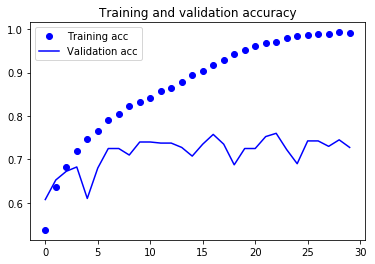

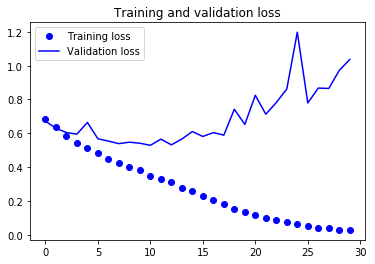

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图1.1

##### 1.2 不做归一化处理
---
可以看出loss基本上没怎么降,归一化是非常重要的

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 22s 135ms/step - loss: 8.0063 - acc: 0.5025 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/30
160/160 [==============================] - 15s 95ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/30
160/160 [==============================] - 15s 95ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/30
160/160 [==============================] - 15s 92ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/30
160/160 [==============================] - 16s 98ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/30
160/160 [==============================] - 15s 97ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/30
160/160 [==============================] - 15s 95ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0

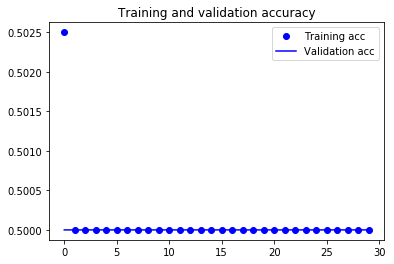

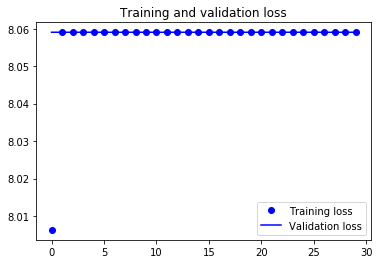

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图1.2 可以看出loss基本上没怎么降,归一化是非常重要的

#### 1.3 数据增强

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 32s 203ms/step - loss: 0.6922 - acc: 0.5288 - val_loss: 0.6833 - val_acc: 0.5550
Epoch 2/30
160/160 [==============================] - 27s 169ms/step - loss: 0.6779 - acc: 0.5650 - val_loss: 0.7459 - val_acc: 0.5100
Epoch 3/30
160/160 [==============================] - 28s 176ms/step - loss: 0.6550 - acc: 0.6144 - val_loss: 0.7354 - val_acc: 0.5275
Epoch 4/30
160/160 [==============================] - 28s 176ms/step - loss: 0.6316 - acc: 0.6459 - val_loss: 0.7766 - val_acc: 0.5800
Epoch 5/30
160/160 [==============================] - 28s 174ms/step - loss: 0.6205 - acc: 0.6522 - val_loss: 0.6726 - val_acc: 0.6250
Epoch 6/30
160/160 [==============================] - 28s 178ms/step - loss: 0.6091 - acc: 0.6678 - val_loss: 0.6096 - val_acc: 0.6775
Epoch 7/30
160/160 [==============================] - 28s 176ms/step - loss: 0.5962 - acc: 0.6819 - val_los

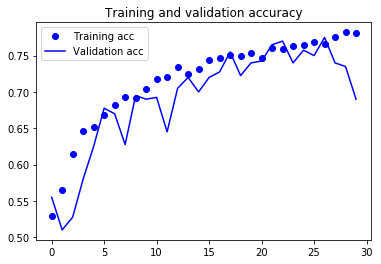

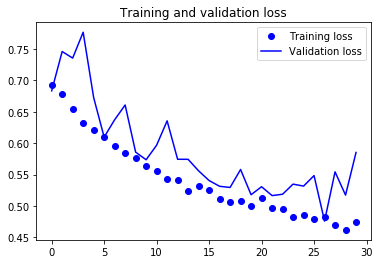

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图1.3   
尚未收敛(应增大epochs)，数据增强后验证集的准确率和loss都是紧紧攀附的，模型应该继续训练能够达到更高的准确率和更小的loss，另外，也可以在Dense全连接层之前添加Dropout减少过拟合的程度